In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import umap.umap_ as umap

from model import HMMPoisson

# Import data

In [2]:
df = pd.read_csv("df.csv")
X = df.drop(columns= ["headAngel", "sin_angel", "cos_angel"])
y = df.headAngel

# Vizualization


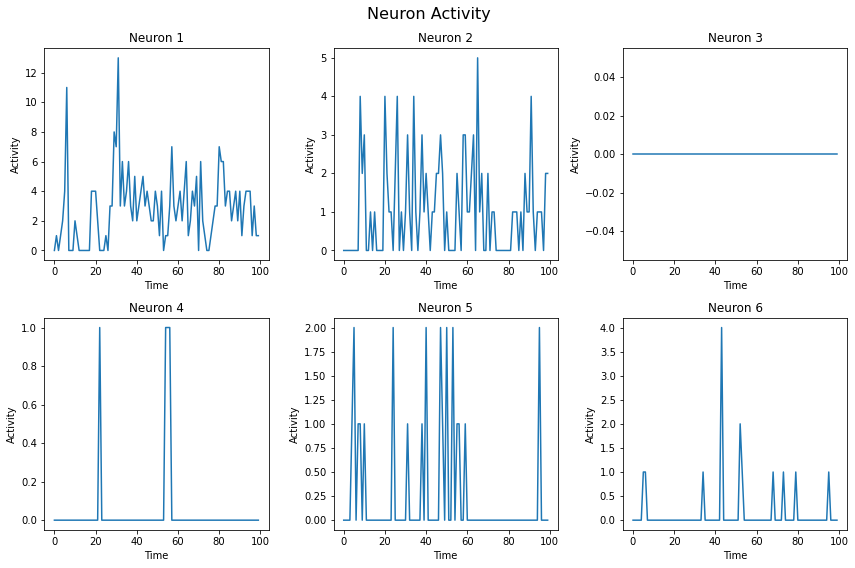

In [3]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle("Neuron Activity", fontsize=16)

t = 100 

for i in range(6):
    row, col = divmod(i,3)
    ax = axes[row, col]
    
    ax.plot(range(t), df[f"cell_{i}"][0:t])
    ax.set_title(f"Neuron {i + 1}")
    ax.set_xlabel("Time")
    ax.set_ylabel("Activity")

# Adjust spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()

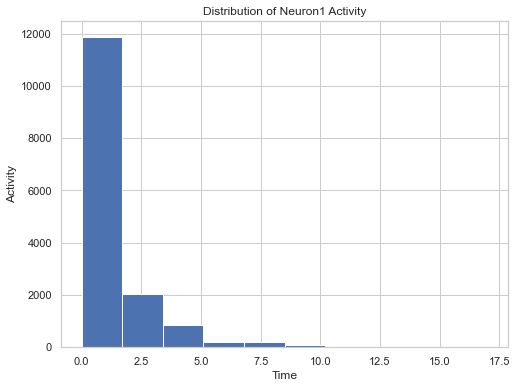

In [5]:
# Create a bar plot for the distribution of Neuron1's activity
plt.figure(figsize=(8, 6))

plt.hist(df["cell_0"])

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Activity')
plt.title('Distribution of Neuron1 Activity')

# Show the plot
plt.show()


# Remove inactive neurons

In [15]:
X = X.loc[:,X.sum(axis=0) > 100]
X.shape

(15243, 59)

# UMAP

In [19]:
df_pure = df[~np.isnan(df["headAngel"])]

X_pure = df_pure.drop(columns= ["headAngel", "sin_angel", "cos_angel"])
y_pure = df_pure.headAngel

X_pure = X_pure.loc[:,X_pure.sum(axis=0) > 100]

In [21]:
X_scaled = StandardScaler().fit_transform(X_pure)

reducer = umap.UMAP(n_neighbors=50, min_dist=1)

embedding = reducer.fit_transform(X_scaled)

In [22]:
def map_list_to_segments(values, num_segments=10):
    segment_indices = []

    for value in values:
        if value < 0:
            value = 0
        elif value >= 2 * np.pi:
            value = 2 * np.pi - 1e-6  # To ensure that 2π gets mapped to the last segment.
        
        segment_width = (2 * np.pi) / num_segments
        segment_index = int(value / segment_width)
        segment_indices.append(segment_index)

    return segment_indices

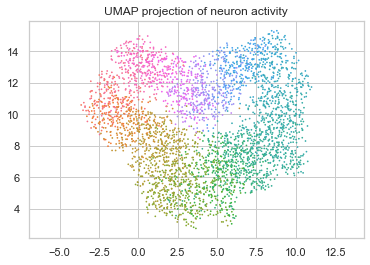

In [23]:
segment_hd = map_list_to_segments(y_pure, len(y_pure))
custom_palette = sns.color_palette("husl", len(segment_hd))

plt.scatter(
    embedding[:, 0],
    embedding[:, 1], c=[custom_palette[x] for x in segment_hd], s=0.5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of neuron activity');